In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel('Exercise.xlsx')
df.columns = list(df.iloc[0, :].values)
df.drop(index=0, inplace=True)
df.head(5)

,Name,Gender,Age,Height(cm),Weight(kg),Lifestyle,Exercise,Daily Calories Intake,Target,How motivated are you for being healthy\n(in %),Body Mass Index (BMI),Basal Metabolic Rate (BMR),Type,Body Fat Percentage (BFP),Body Type,Daily Calorie Need (Based on BMR and Exercise)\n(in Calorie),Total Daily Energy Expenditure (TDEE) (Based on BMR and Lifestyle)\n(in Calorie),Calorie Difference (Daily Calorie Intake - TDEE),Suggestion
1,A1,Male,18,152,50,1. Sedentary or light activity (e.g. - Office ...,1. Sedentary (little or no exercise),2067.152431,Loose Weight,80,21.641274,1392.866,Boy,17.878324,Normal,1671.4392,2131.08498,-0.03,LOW CARB DIET (25:35:40)
2,A2,Male,18,152,54,1. Sedentary or light activity (e.g. - Office ...,2. Lightly active (light exercise/sports 1-3 d...,1705.730935,Maintain Weight,78,23.372576,1447.866,Boy,20.49259,Normal,1990.81575,2215.23498,-0.23,BALANCE DIET (55:25:20)
3,A3,Male,18,152,58,1. Sedentary or light activity (e.g. - Office ...,3. Moderately active (moderate exercise/sports...,1910.142686,Gain Muscle,65,25.103878,1502.866,Boy,23.106856,Overweight,2329.4423,2299.38498,-0.18,BALANCE DIET (55:25:20)
4,A4,Male,18,152,62,3. Vigorously active (Agricultural worker (non...,4. Very active (hard exercise/sports 6-7 days ...,2552.952908,Loose Weight,82,26.83518,1557.866,Boy,25.721122,Overweight,2687.31885,3505.1985,-0.271667,KETOGENIC DIET (5:35:60)
5,A5,Male,18,152,66,1. Sedentary or light activity (e.g. - Office ...,1. Sedentary (little or no exercise),1826.086885,Maintain Weight,75,28.566482,1612.866,Boy,28.335388,Overweight,1935.4392,2467.68498,-0.26,BALANCE DIET (55:25:20)


In [9]:
df.columns

Index(['Name', 'Gender', 'Age', 'Height(cm)', 'Weight(kg)', 'Lifestyle',
       'Exercise', 'Daily Calories Intake', 'Target',
       'How motivated are you for being healthy\n(in %)',
       'Body Mass Index (BMI)', 'Basal Metabolic Rate (BMR)', 'Type',
       'Body Fat Percentage (BFP)', 'Body Type',
       'Daily Calorie Need (Based on BMR and Exercise)\n(in Calorie)',
       'Total Daily Energy Expenditure (TDEE) (Based on BMR and Lifestyle)\n(in Calorie)',
       'Calorie Difference (Daily Calorie Intake - TDEE)', 'Suggestion'],
      dtype='object')

In [10]:
min = df['Body Fat Percentage (BFP)'].min()
max = df['Body Fat Percentage (BFP)'].max()
min, max

(6.973754377490639, 57.33393351800554)

In [11]:
# Mapping String to numeric values.
df['Gender']=df['Gender'].map({"Male":0,"Female":1})
df['Body Type']=df['Body Type'].map({"Underweight":0,"Normal":1,"Overweight":2,"Obese":3})
df['Type']=df['Type'].map({"Boy":0,"Girl":1,"Adult Male":2,"Adult Female":3})
df['Suggestion']=df['Suggestion'].map({"LOW CARB DIET (25:35:40)":0,"BALANCE DIET (55:25:20)":1,"ZONE DIET (40:30:30)":2,"KETOGENIC DIET (5:35:60)":3,"DEPLETION DIET (DYNAMIC)":4,"HIGH CARB DIET(60:20:20)":5})
df['Target']=df['Target'].map({"Loose Weight":0,"Maintain Weight":1,"Gain Muscle":2})
df['Lifestyle']=df['Lifestyle'].map({"1. Sedentary or light activity (e.g. - Office worker getting little or no exercise)":0,"2. Active or moderately active (Construction worker or person running one hour daily)":1,"3. Vigorously active (Agricultural worker (non mechanized) or person swimming two hours daily)":2})
df['Exercise']=df['Exercise'].map({"1. Sedentary (little or no exercise)":0,"2. Lightly active (light exercise/sports 1-3 days/ week)":1,"3. Moderately active (moderate exercise/sports 3-5days/week)":2,"4. Very active (hard exercise/sports 6-7 days a week)":3})

<AxesSubplot:xlabel='Age', ylabel='Count'>

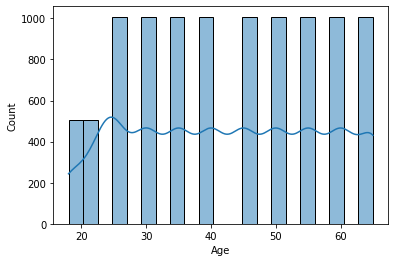

In [12]:
sns.histplot(df['Age'], kde=True)

<Figure size 3240x720 with 0 Axes>

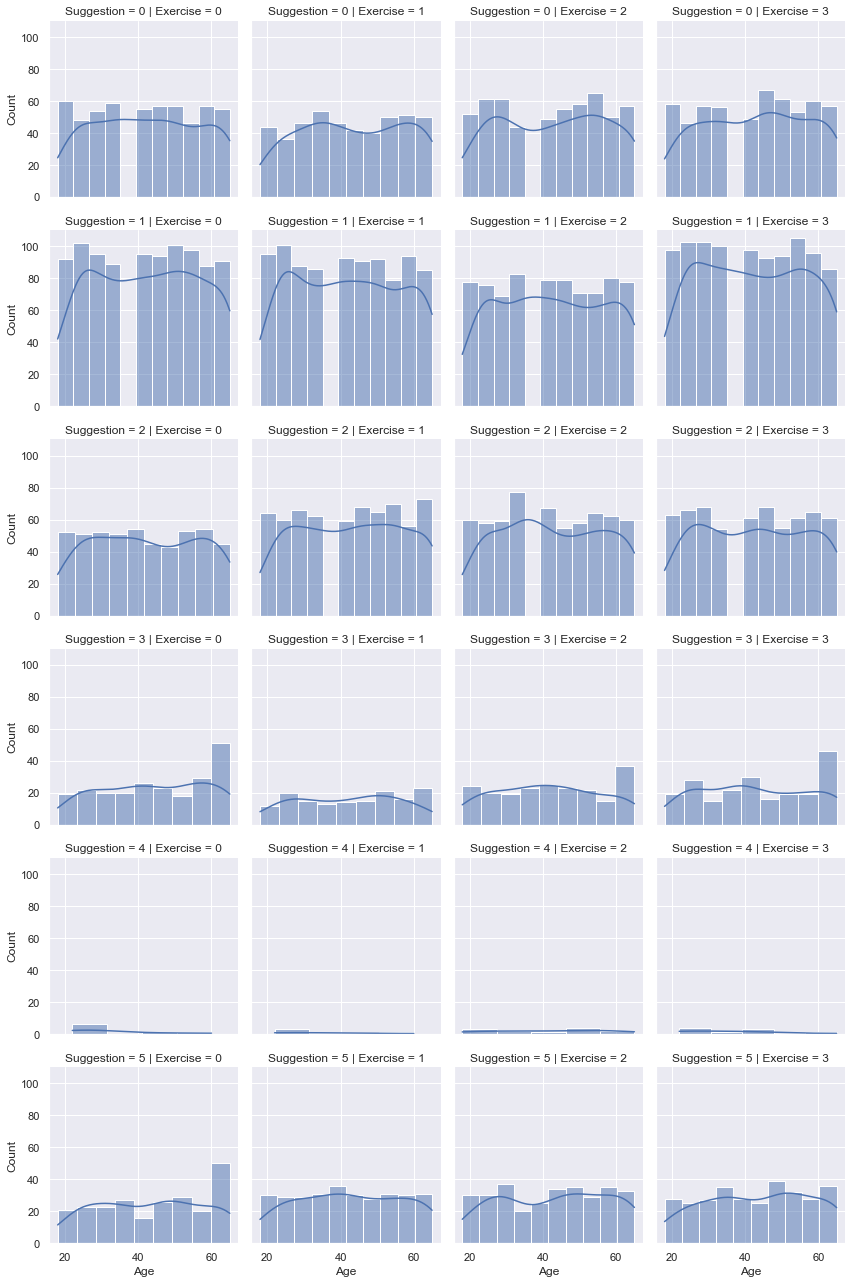

In [13]:
sns.set(rc={'figure.figsize':(12.7,8.6)})
plt.figure(figsize=(45,10))
g = sns.FacetGrid(df, row='Suggestion', col='Exercise')
g.map(sns.histplot, "Age", kde=True)
plt.show()

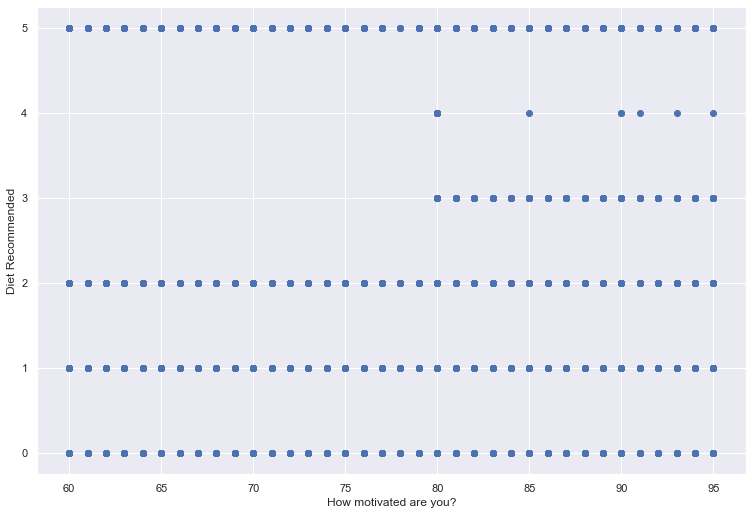

In [14]:
plt.scatter(df['How motivated are you for being healthy\n(in %)'], df['Suggestion'])
plt.xlabel("How motivated are you?")
plt.ylabel("Diet Recommended")
plt.show()

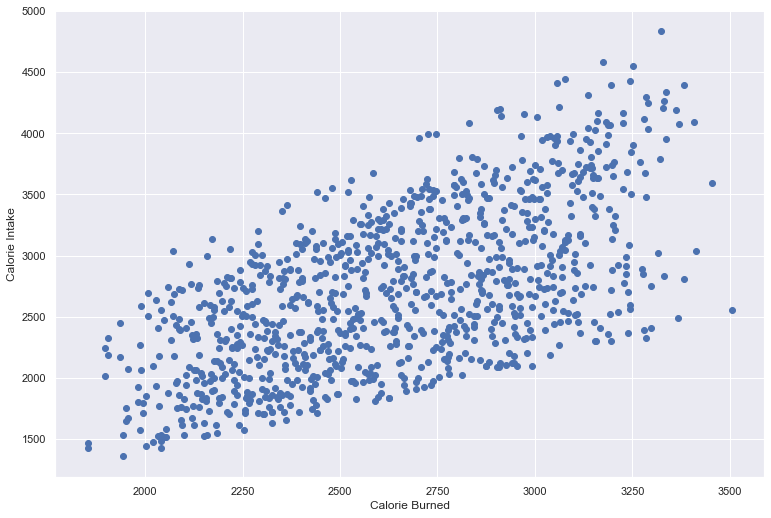

In [15]:
plt.scatter(df['Total Daily Energy Expenditure (TDEE) (Based on BMR and Lifestyle)\n(in Calorie)'][:1000], df['Daily Calories Intake'][:1000])
plt.xlabel("Calorie Burned")
plt.ylabel("Calorie Intake")
plt.show()